In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yasserh/titanic-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/titanic-dataset


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
 df = pd.read_csv(f"{path}/Titanic-Dataset.csv")


In [9]:
 print(df.tail())

     PassengerId  Survived  Pclass                                      Name  \
886          887         0       2                     Montvila, Rev. Juozas   
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch      Ticket   Fare Cabin Embarked  
886    male  27.0      0      0      211536  13.00   NaN        S  
887  female  19.0      0      0      112053  30.00   B42        S  
888  female   NaN      1      2  W./C. 6607  23.45   NaN        S  
889    male  26.0      0      0      111369  30.00  C148        C  
890    male  32.0      0      0      370376   7.75   NaN        Q  


In [10]:
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [12]:
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [13]:
print(df.shape)

(891, 12)


In [14]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [16]:
print(df.dropna())

     PassengerId  Survived  Pclass  \
1              2         1       1   
3              4         1       1   
6              7         0       1   
10            11         1       3   
11            12         1       1   
..           ...       ...     ...   
871          872         1       1   
872          873         0       1   
879          880         1       1   
887          888         1       1   
889          890         1       1   

                                                  Name     Sex   Age  SibSp  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
6                              McCarthy, Mr. Timothy J    male  54.0      0   
10                     Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                            Bonnell, Miss. Elizabeth  female  58.0      0   
..                                                 ...     ...   ... 

In [17]:
print(df['Age'].fillna((df['Age']).mean()))

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64


In [21]:
cabin_mode = df['Cabin'].mode()[0]
print(df['Cabin'].fillna(cabin_mode))

0      B96 B98
1          C85
2      B96 B98
3         C123
4      B96 B98
        ...   
886    B96 B98
887        B42
888    B96 B98
889       C148
890    B96 B98
Name: Cabin, Length: 891, dtype: object


In [24]:
embarked_mode = df['Embarked'].mode()[0]
print(df['Embarked'].fillna(embarked_mode))


0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object


In [25]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
lst=['Name','Sex','Ticket','Cabin','Embarked']  #each unique cateogary is assign to unique integer value
for i in lst:
  df[i]=le.fit_transform(df[i])
  df

In [26]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_normalized = df.copy()
df_normalized[df.columns] = scaler.fit_transform(df)

print(df_normalized)


     PassengerId  Survived  Pclass      Name  Sex       Age  SibSp     Parch  \
0       0.000000       0.0     1.0  0.121348  1.0  0.271174  0.125  0.000000   
1       0.001124       1.0     0.0  0.213483  0.0  0.472229  0.125  0.000000   
2       0.002247       1.0     1.0  0.396629  0.0  0.321438  0.000  0.000000   
3       0.003371       1.0     0.0  0.305618  0.0  0.434531  0.125  0.000000   
4       0.004494       0.0     1.0  0.016854  1.0  0.434531  0.000  0.000000   
..           ...       ...     ...       ...  ...       ...    ...       ...   
886     0.995506       0.0     0.5  0.615730  1.0  0.334004  0.000  0.000000   
887     0.996629       1.0     0.0  0.340449  0.0  0.233476  0.000  0.000000   
888     0.997753       0.0     1.0  0.464045  0.0       NaN  0.125  0.333333   
889     0.998876       1.0     0.0  0.091011  1.0  0.321438  0.000  0.000000   
890     1.000000       0.0     1.0  0.247191  1.0  0.396833  0.000  0.000000   

       Ticket      Fare     Cabin  Emba

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_standardized = df.copy()
df_standardized[df.columns] = scaler.fit_transform(df)

print(df_standardized)


     PassengerId  Survived    Pclass      Name       Sex       Age     SibSp  \
0      -1.730108 -0.789272  0.827377 -1.310217  0.737695 -0.530377  0.432793   
1      -1.726220  1.266990 -1.566107 -0.991410 -1.355574  0.571831  0.432793   
2      -1.722332  1.266990  0.827377 -0.357685 -1.355574 -0.254825 -0.474545   
3      -1.718444  1.266990 -1.566107 -0.672604 -1.355574  0.365167  0.432793   
4      -1.714556 -0.789272  0.827377 -1.671790  0.737695  0.365167 -0.474545   
..           ...       ...       ...       ...       ...       ...       ...   
886     1.714556 -0.789272 -0.369365  0.400452  0.737695 -0.185937 -0.474545   
887     1.718444  1.266990 -1.566107 -0.552079 -1.355574 -0.737041 -0.474545   
888     1.722332 -0.789272  0.827377 -0.124412 -1.355574       NaN  0.432793   
889     1.726220  1.266990 -1.566107 -1.415189  0.737695 -0.254825 -0.474545   
890     1.730108 -0.789272  0.827377 -0.874774  0.737695  0.158503 -0.474545   

        Parch    Ticket      Fare     C

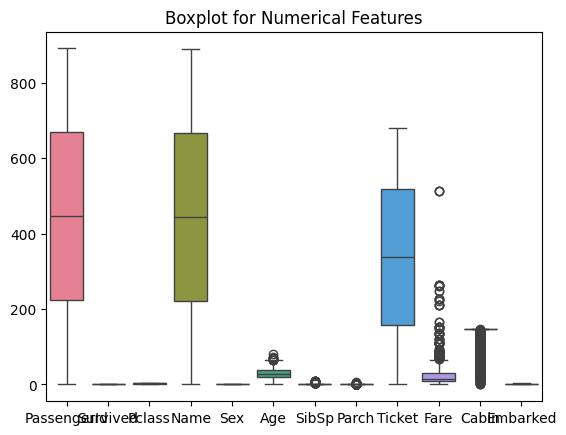

In [28]:
sns.boxplot(data=df)
plt.title("Boxplot for Numerical Features")
plt.show()


### You get clean data without extreme outliers.
### Boxplots before/after help you visually confirm the difference.

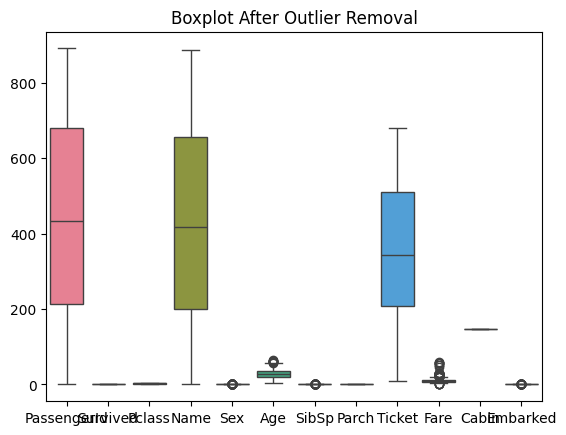

     PassengerId  Survived  Pclass  Name  Sex   Age  SibSp  Parch  Ticket  \
0              1         0       3   108    1  22.0      1      0     523   
2              3         1       3   353    0  26.0      0      0     669   
4              5         0       3    15    1  35.0      0      0     472   
9             10         1       2   576    0  14.0      1      0     132   
12            13         0       3   729    1  20.0      0      0     535   
..           ...       ...     ...   ...  ...   ...    ...    ...     ...   
882          883         0       3   193    0  22.0      0      0     508   
883          884         0       2    61    1  28.0      0      0     565   
884          885         0       3   793    1  25.0      0      0     650   
886          887         0       2   548    1  27.0      0      0     101   
890          891         0       3   220    1  32.0      0      0     466   

        Fare  Cabin  Embarked  
0     7.2500    147         2  
2     7.925

In [29]:
# Function to remove outliers based on IQR
def remove_outliers_iqr(df):
    df_clean = df.copy()
    for col in df.select_dtypes(include='number'):
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]
    return df_clean

df_cleaned = remove_outliers_iqr(df)

# Visualize after removing outliers
sns.boxplot(data=df_cleaned)
plt.title("Boxplot After Outlier Removal")
plt.show()

print(df_cleaned)
